# **GROUP 8 - Solutions to P05: Least squares and regression**

**Students:**
- Marek Majoch, <s13mmajo@uni-bonn.de>, M.Sc Astrophysics
- Yanhanle Lauryn Zhao, <s19yzhao@uni-bonn.de>, M.Sc Astrophysics
- Diana Victoria Lopez Navarro, <s09dlope@uni-bonn.de>, M.Sc Astrophysics
- Rutul Kumar, <s23rkuma@uni-bonn.de>, M.Sc Astrophysics

**Deadline:** 14. Nov 2024, 13:00 
_______________________________________________________


## Problem 1: Extracting and plotting galaxy spectrum templates

In the `data` directory you can find a fits-file containing the model spectra, `k_nmf_derived.newdefaults.fits`, we want to use to fit the observed spectrum later. You'll also find a python script in the `scripts` directory that shows you how to work with the templates. 

Extract and plot the unsmoothed templates with all components included.

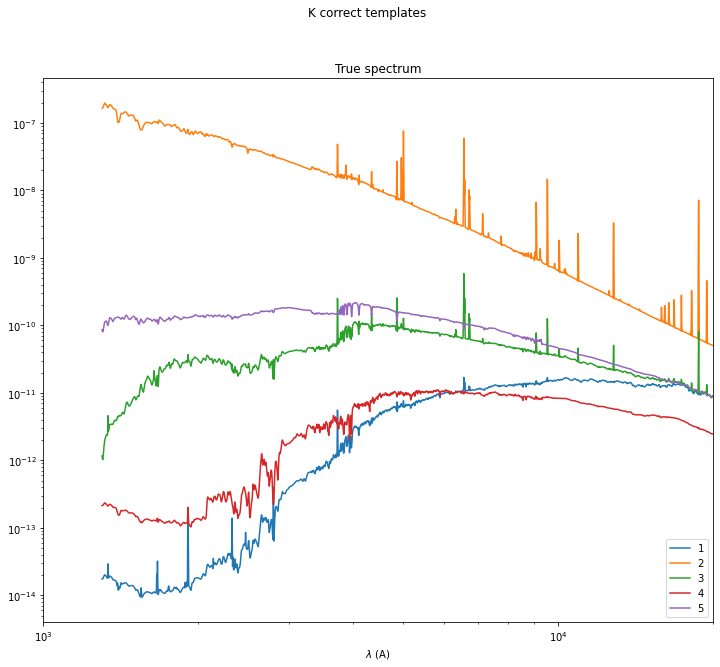

<Figure size 432x288 with 0 Axes>

In [56]:
%run ./scripts/get_templates.py

In [57]:
import math
import numpy as np
from scipy.optimize import minimize
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

## Problem 2: Fitting a local spectrum

In this problem, we will fit a local (i.e. redshift zero) galaxy spectrum, which we assume to be a linear combination of the template spectra given in problem 1. The spectrum can be found in the `data` directory in `localspectrum.txt`.

-----
(i) Formulate and solve the least squares problem of finding the best fit amplitudes of the templates from problem 1.  

First, lets define our sample
\begin{gather*}
f_{\lambda _{i}} :\ Galaxy\ Flux\ at\ a\ given\ wavelength\ \lambda _{i}\\
t_{\lambda _{i}} \ :\ Template\ Flux\ at\ a\ given\ wavelength\ \lambda _{i}\\
\\
\text{The flux at a given wavelength is a linear combination of the templates, such that:}\\
\\
f_{\lambda _{i}} \ =\ \theta _{1} t_{\lambda _{i}}^{1} +\theta _{2} t_{\lambda _{i}}^{2} +\theta _{3} t_{\lambda _{i}}^{3} +\theta _{4} t_{\lambda _{i}}^{4} +\ \theta _{5} t_{\lambda _{i}}^{5} \ +\ \epsilon \ \ \\
\\
\text{In matrix notation:}\ \\
f=\mathbf{X} \theta \\
\\
where\\
\\
f:\ =\ \begin{bmatrix}
f_{\lambda _{i}}\\
.\\
.\\
f_{\lambda _{n}}
\end{bmatrix} ,\ \theta :=\ \begin{bmatrix}
\theta _{1}\\
\theta _{2}\\
\theta _{3}\\
\theta _{4}\\
\theta _{5}
\end{bmatrix} \ ,\ X:=\begin{bmatrix}
1 & t_{\lambda _{0}}^{1} & t_{\lambda _{0}}^{2} & t_{\lambda _{0}}^{3} & t_{\lambda _{0}}^{4} & t_{\lambda _{0}}^{5}\\
. & . & . & . & . & .\\
. & . & . & . & . & .\\
1 & t_{\lambda _{n}}^{1} & t_{\lambda _{n}}^{2} & t_{\lambda _{n}}^{3} & t_{\lambda _{n}}^{4} & t_{\lambda _{n}}^{5}
\end{bmatrix} \ \\
\\
\text{As it was shown in class (assuming C = diag(1)), the Estimator for the parameter reduces to solving the system of linear equations:}\\
\\
\hat{\theta } \ =\ \left( X^{T} X\right)^{-1} X^{T} \ f\ \ \ \ \ \ \ \ \hat{\theta } \ \ =\ ( \epsilon \ ,\theta _{1} ,\theta _{2} ,\theta _{3} ,\theta _{4} ,\theta _{5})\\
\\
\text{And the residual errors are given by:}\\
\\
\chi ^{2} =\ \sum \left( f_{_{\lambda _{i}}} -\ \hat{\theta }_{p} \ t_{\lambda _{i}}^{p}\right)^{2} \ 
\end{gather*}

________________________
(ii) Implement your own linear least squares solver and compute the best-fit template amplitudes for `localspectrum.txt`.


In [79]:
# Load data
template_file = 'data/k_nmf_derived.newdefault.fits'
hdulist = fits.open(template_file)
lam = hdulist[11].data
templates = hdulist[1].data

# Load local spectrum
local_spectrum = np.loadtxt('data/localspectrum.txt')

#Normalization (we will recover the values later)
flux_norm = local_spectrum/ np.max(local_spectrum)
templates_norm = templates/ np.max(templates)
X=templates_norm.T #Transpose to have right shape of array
X = np.hstack((np.ones((templates.shape[1], 1)), X)) #Adding column with 1's

 $\hat{\theta}$ estimation

In [80]:
pa = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),flux_norm.T)

for i in range(len(pa)):
    print(f"theta-{i} = {pa[i]:.6e}")

theta-0 = 2.710535e-10
theta-1 = 2.747730e+00
theta-2 = -7.762349e-11
theta-3 = 2.073565e+02
theta-4 = 7.623246e+03
theta-5 = 6.784011e-06


In [81]:
# Calculate best fit
best_fit_analytic = np.dot(X, pa)
best_fit_analytic = best_fit_analytic * np.max(local_spectrum) #Scaling

$\chi^2$ - Residual.

In [82]:
residuals = np.sum((local_spectrum - best_fit_analytic)**2)
print(f"\nSum of squared residuals: {residuals:.6e}")


Sum of squared residuals: 1.215684e-49


Plot for Analytical solution

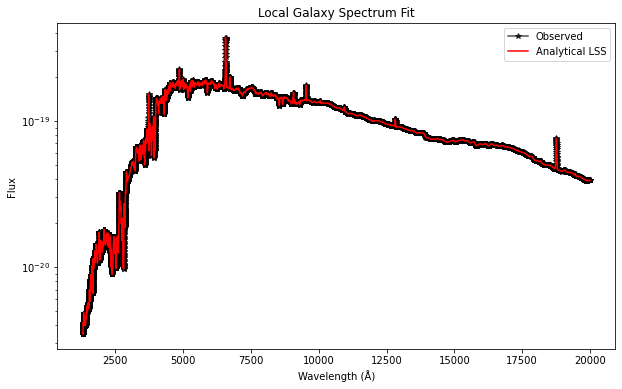

In [102]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(lam, local_spectrum, 'k-', label='Observed', alpha=0.7, marker= '*')
plt.plot(lam, best_fit_analytic, 'r-', label='Analytical LSS')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.legend()
plt.title('Local Galaxy Spectrum Fit')
plt.xscale('linear')
plt.yscale('log')

(iii) Compare your results to what you obtain using `numpy`'s implementation. 

Data shapes and values:
Templates shape: (5, 27330)
Local spectrum shape: (27330,)

Template values range: [9.344070215657179e-15, 1.9709884213625628e-07]
Local spectrum values range: [3.477404157090902e-21, 3.712956226903185e-19]

NaN in templates: False
Inf in templates: False
NaN in local spectrum: False
Inf in local spectrum: False

Best-fit coefficients:
Template 1: 2.747734e+00
Template 2: 2.890804e-11
Template 3: 2.073565e+02
Template 4: 7.623246e+03
Template 5: 7.123055e-06

Sum of squared residuals: 1.215712e-49

Mean percentage difference: 0.000002%


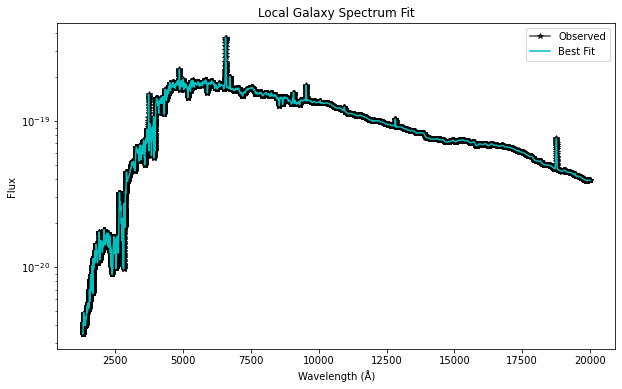

In [100]:
# Print diagnostic information
print("Data shapes and values:")
print(f"Templates shape: {templates.shape}")
print(f"Local spectrum shape: {local_spectrum.shape}")
print(f"\nTemplate values range: [{np.min(templates)}, {np.max(templates)}]")
print(f"Local spectrum values range: [{np.min(local_spectrum)}, {np.max(local_spectrum)}]")

# Check for NaN or inf values
print(f"\nNaN in templates: {np.any(np.isnan(templates))}")
print(f"Inf in templates: {np.any(np.isinf(templates))}")
print(f"NaN in local spectrum: {np.any(np.isnan(local_spectrum))}")
print(f"Inf in local spectrum: {np.any(np.isinf(local_spectrum))}")

# Normalize the data
templates_normalized = templates / np.max(templates)
local_spectrum_normalized = local_spectrum / np.max(local_spectrum)

# Setup the least squares problem with normalized data
A = templates_normalized.T
b = local_spectrum_normalized

# Solve
coefficients = np.linalg.lstsq(A, b, rcond=None)[0]

# Calculate best fit
best_fit = np.dot(A, coefficients)

# Rescale back
best_fit = best_fit * np.max(local_spectrum)

# Print results
print("\nBest-fit coefficients:")
for i, coeff in enumerate(coefficients):
    print(f"Template {i+1}: {coeff:.6e}")

# Calculate residuals
residuals = np.sum((local_spectrum - best_fit)**2)
print(f"\nSum of squared residuals: {residuals:.6e}")

# Calculate mean percentage difference
mean_percent_diff = np.mean(np.abs((local_spectrum - best_fit)/local_spectrum)) * 100
print(f"\nMean percentage difference: {mean_percent_diff:.6f}%")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(lam, local_spectrum, 'k-', label='Observed', alpha=0.7, marker= '*')
plt.plot(lam, best_fit, 'c-', label='Best Fit')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.legend()
plt.title('Local Galaxy Spectrum Fit')
plt.xscale('linear')
plt.yscale('log')


## Problem 3: Fitting a redshifted spectrum

The file `redshiftedspectrum.txt` contains a redshifted spectrum. Fitting both redshift and template amplitudes is no longer a linear problem. 

Find the redshift by solving the linear problem of problem 2 on a grid of redshifts between 0 and 1.

The file `redshiftedspectrum.txt` contains a redshifted spectrum. Fitting both redshift and template amplitudes is no longer a linear problem. 

Find the redshift by solving the linear problem of problem 2 on a grid of redshifts between 0 and 1.

In [85]:
model = tspec_v0.T # no smoothing data as template, shape (27330,5)

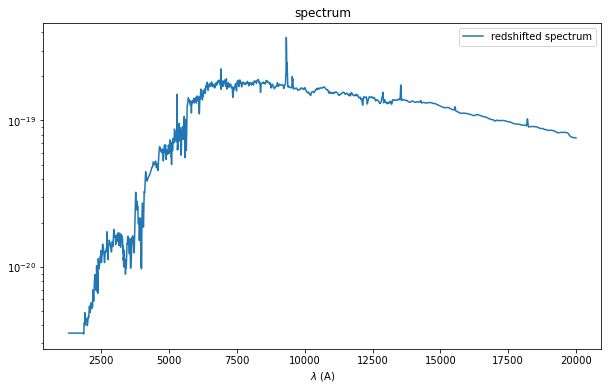

In [104]:
# import the redshifted spectrum and plot
redshifted_spectrum = np.loadtxt('data/redshiftedspectrum.txt') 

plt.figure(figsize=(10, 6))
plt.plot(lam, redshifted_spectrum, label='redshifted spectrum')
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('$\lambda$ (A)')
plt.title('spectrum')
plt.legend()

In [87]:
idx = redshifted_spectrum.size - np.where(lam>np.max(lam)/(1+1))[0][0] 
# find the index that represent the largest possible redshift (i.e. z=1)
x_lls = np.zeros((idx, 5))
redshift = np.zeros(idx)
spec_diff = np.zeros(idx)

for i in np.arange(idx):
    # set the difference in adjacent wavelength in lam to be Δλ, shift the observed spectrum by i*Δλ and fit with templates
    emi_spectrum = redshifted_spectrum[i:] 
    redshift[i] = lam[i] / lam[0] - 1 
    spec_size = emi_spectrum.size
    model_z = model[0: redshifted_spectrum.size-i, :] 
    inv_mt_m_z = np.linalg.solve(np.matmul(model_z.T, model_z), np.identity(5)) 
    x_lls[i,:] = np.matmul(np.matmul(inv_mt_m_z, model_z.T), emi_spectrum) 
    # model M, (M^T M)^{-1} * M^T * b = x_lls
    model_spec = np.matmul(model_z, x_lls[i,:]) 
    # fitted spectrum computed from x_lls
    spec_diff[i] = np.sum(np.abs(emi_spectrum - model_spec)) 
    # sum of absolute difference between observation spectrum and fitted spectrum

0.41997694969177246


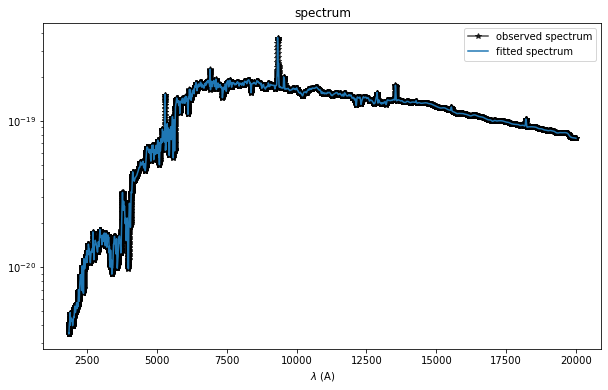

In [105]:
i = np.argmin(spec_diff) # find the index where residual between fitted spectrum and observed spectrum is the smallest
plt.figure(figsize=(10, 6))
plt.plot(lam[i:], redshifted_spectrum[i:], label='observed spectrum', alpha=0.7, marker= '*',color='k')
plt.plot(lam[i:], np.matmul(model[0: redshifted_spectrum.size-i, :], x_lls[i]), label='fitted spectrum')
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('$\lambda$ (A)')
plt.title('spectrum')
plt.legend()
print(redshift[i])

As shown above, an estimation of redshift based on the fitting of spectrum is $z\sim 0.42$.